<a href="https://colab.research.google.com/github/toiek7/Scalable-algorithm/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A convolution operation between RGB image $I$ and a filter $f$

\begin{equation}
  (I*f)(n,m) = \sum\limits_{c=0}^{2}\sum\limits_{i=0}^{k-1}\sum\limits_{j=0}^{l-1} I(n+i,m+j,c)\times f(i,j,c)
\end{equation}

Note: $c$ here represents channel where $c=0$ represents "Red" channel, $c=1$ represents "Green" channel, $c=2$ represents "Blue" channel. E.g., $I(10,15,0)$ represents the red pixels value at position $(10,15)$

In reality, we apply many fitlers when we do a convolution operation. The output of a convolution between an RGB image $I$ and a batch of filters $f$ is

\begin{equation}
  (I*f)(n,m,k) = \sum\limits_{c=0}^{2}\sum\limits_{i=0}^{k-1}\sum\limits_{j=0}^{l-1} I(n+i,m+j,c)\times f_k(i,j,c)
\end{equation}
where $f_k$ is the $k$th filter. This means we apply convolution separately between the image and each filter, then concatenate the results along the channel axis.

###**Question 3.1 [30 points]**: 
Use the functions in https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html#torch.nn.functional.conv2d 
and 
https://pytorch.org/docs/stable/generated/torch.nn.functional.relu.html,
write a convolution output between an image and a filter with relu activation. Use any stride you want but make sure that the output shape is the same as the image shape.

In [10]:
# TO DO
import torch
def convolution(image,filter):
  """
  Input shape:
    image: 1 x 3 x H x W 
    filter: 1 x 3 x k x k 
  Expected output shape: 1
  """
  # Hints: it should be a 1 or 2 lines max
  # Write your function here
  newImage=torch.nn.functional.conv2d(image, filter, bias=None, stride=1, padding="same", dilation=1, groups=1)
  output=torch.nn.functional.relu(newImage, inplace=False)
  print(image.shape)
  print(output.shape)
  return output

###**Question 3.2 [10 points]**: 
We are going to visualize the output of convolution between an image and a filter. First we are going to download an image and create a filter.

Make sure to turn on GPU by going to Runtime --> Change runtime type --> Choose GPU

In [11]:
from PIL import Image
import requests
import torchvision.transforms as transforms
from io import BytesIO
url="https://cdn.wamiz.fr/article/images/WAMIZ%20ES/FEBRERO%202021/MARZO%202021/samoyedolenguanombres.jpg"
# download image from url
im1 = Image.open(requests.get(url, stream=True).raw)
transform = transforms.Compose([
    transforms.PILToTensor()
])
  
# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor1 = transform(im1)/255.
img_tensor1[0] -= img_tensor1[0].mean()
img_tensor1[1] -= img_tensor1[1].mean()
img_tensor1[2] -= img_tensor1[2].mean() 

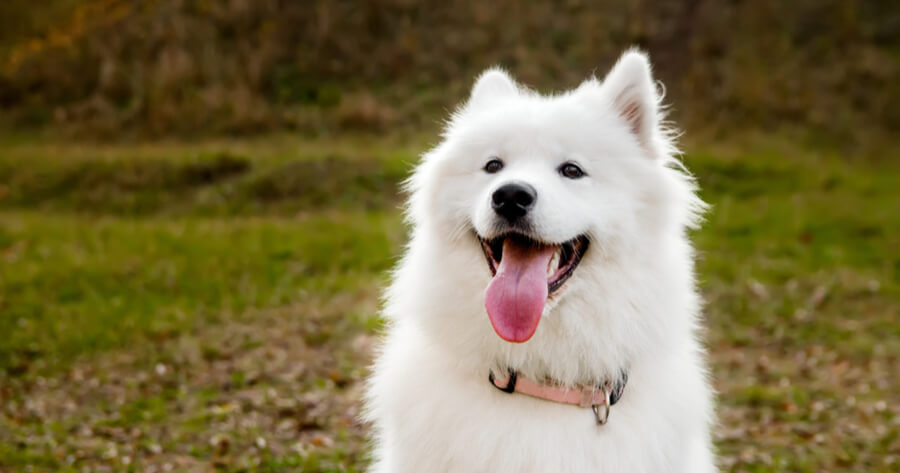

In [12]:
im1

In [13]:
# Create a filter
filter = im1.crop((490, 180, 535, 220))
filter_tensor = img_tensor1[:,180:220,490:540].unsqueeze(0)

We are going visualize the convolution output. Remember that the convolutional output is like an image. We will overlay the original image and the convolution output. The value of convolution output is depicted by the color (red= the higher value, blue color = low value). The higher value means that the filter detect the "feature".

torch.Size([3, 473, 900])
torch.Size([1, 473, 900])


<ipython-input-10-c916da32503c>:12: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  newImage=torch.nn.functional.conv2d(image, filter, bias=None, stride=1, padding="same", dilation=1, groups=1)


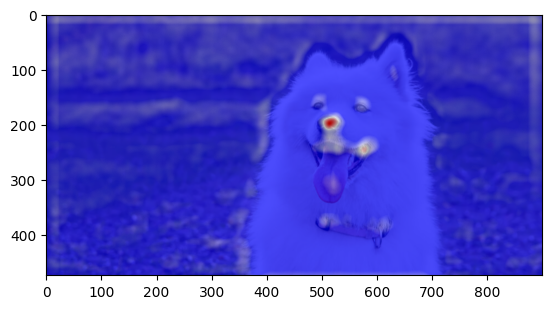

In [14]:
import matplotlib.pyplot as plt
output = convolution(img_tensor1.cuda(),filter_tensor.cuda())
plt.imshow(im1)
plt.imshow(output.cpu().squeeze().numpy(),cmap='bwr',alpha=0.7)

Try with a second image

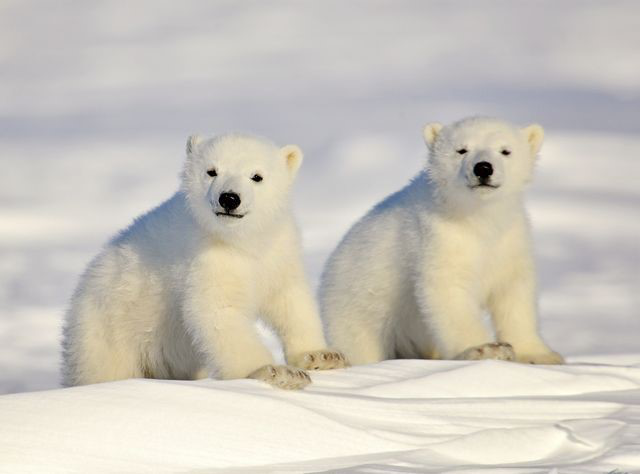

In [15]:
url="https://managersoffice.net/wp-content/uploads/2021/02/babypolarbears.jpg"

im2 = Image.open(requests.get(url, stream=True).raw)
transform = transforms.Compose([
    transforms.PILToTensor()
])
  
# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor2 = transform(im2)/255.
img_tensor2[0] -= img_tensor2[0].mean()
img_tensor2[1] -= img_tensor2[1].mean()
img_tensor2[2] -= img_tensor2[2].mean() 
im2

torch.Size([3, 474, 640])
torch.Size([1, 474, 640])


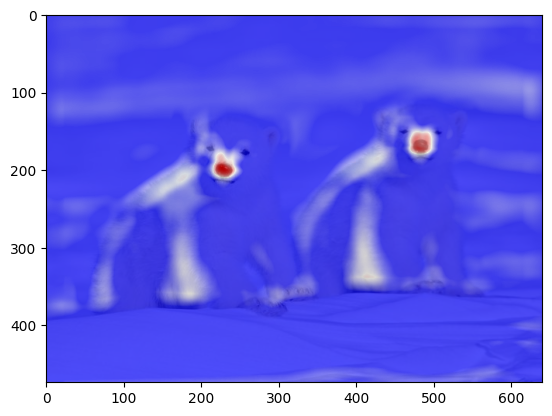

In [19]:
import matplotlib.pyplot as plt
output = convolution(img_tensor2.cuda(),filter_tensor.cuda())
plt.imshow(im2)
plt.imshow(output.cpu().squeeze().numpy(),cmap='bwr',alpha=0.7)

##Question [10 points] : What feature do you think this filter detects (e.g., what kinds of objects/parts)?

##Answer: nose
